In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Challenge 3.1 Brownian motion with systematic displacement

In [2]:
#Parameters
pi= numpy.pi
#Time
T = 25.
dt =0.01
nt= int(T/dt)
print(nt)
#Problem parameters
alpha = 0.2
c= 0.25
gamma = 1.

2500


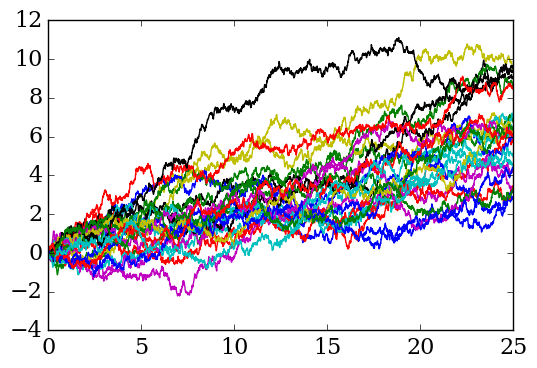

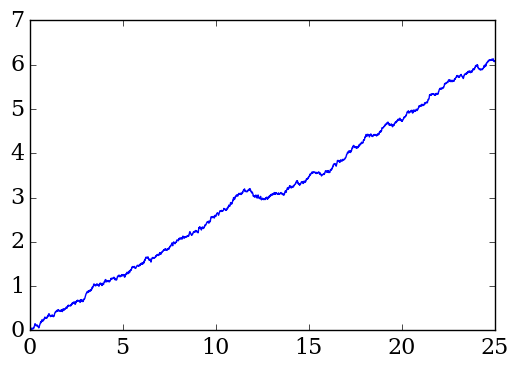

In [3]:
#Simulation for 100 Particles
nparticles = 25
t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,nparticles])
av_x = numpy.empty(nt+1)
#initial position
x[0] = 0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,nparticles) + c*dt
    av_x = x.sum(axis = (1))/nparticles #average position
for i in range(nparticles):
    pyplot.plot(t,x[:,i]) #plot trajectories for each particle
pyplot.figure()
pyplot.plot(t,av_x) #plot average trajectory

Whitout much surprise, we see that this case is similar to the case whitout systematic displacement. We made a change of frames with constant speed, so physics should stay the same.

In [4]:
def normalgauss(x,mu,sigma):
    N_gauss = (2*pi)**-0.5 /sigma * numpy.exp(-0.5/sigma**2 *(x-mu)**2)
    return N_gauss

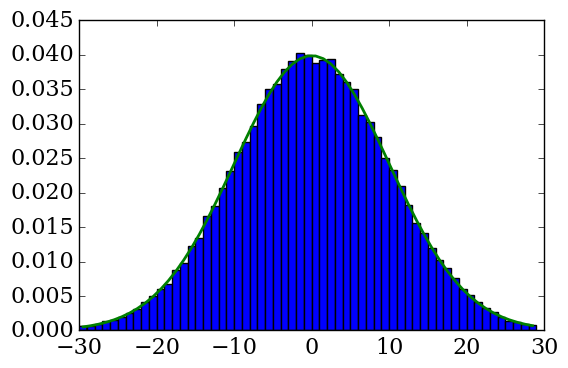

In [5]:
#Plot initial gaussian distribution as histogram
npart=10**5
mu= 0.
sigma = 10

x0=numpy.random.normal(mu,sigma,npart)

#histogram
binwidth = 1
bins = numpy.arange(-30.,30.,binwidth)
pyplot.hist(x0,bins,normed=True);
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,normalgauss(xc,mu,sigma), lw=2)

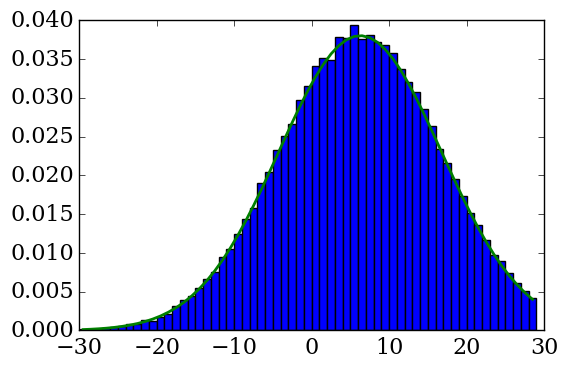

In [6]:
#Plot particles distribution in space after T = 10.
x= numpy.empty([nt+1,npart])
x[0]=x0

for i in range (nt):
    x[i+1] = x[i] + (2*alpha * dt)**0.5 * numpy.random.normal(0,1,npart) + c * dt
    
pyplot.hist(x[-1],bins,normed=True);
#Plot the solution whitout systematic displacement, then add c*T to mean value.
pyplot.plot(xc,normalgauss(xc,c*T,(sigma**2+(2*alpha*T))**0.5), lw=2)

Again, there's no big surprise. We just translated the system by c*T. It is easy to guess equations governing particle density.

# J'ai la flemme pour l'instant d'ecrire les equations en LATEX

# Challenge 3.2

In [7]:
T = 25.
dt =0.01
nt= int(T/dt)
print(nt)
#Problem parameters
alpha = 0.2
c= 1
gamma = 0.2

2500


Wall time: 480 ms


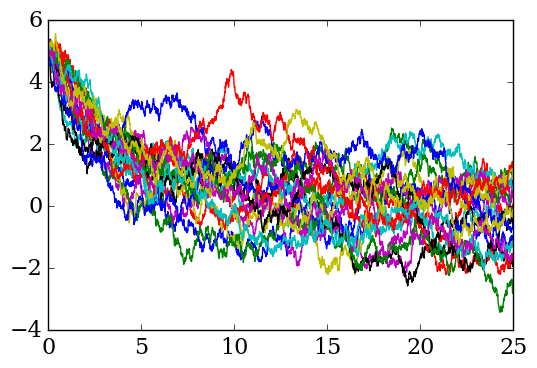

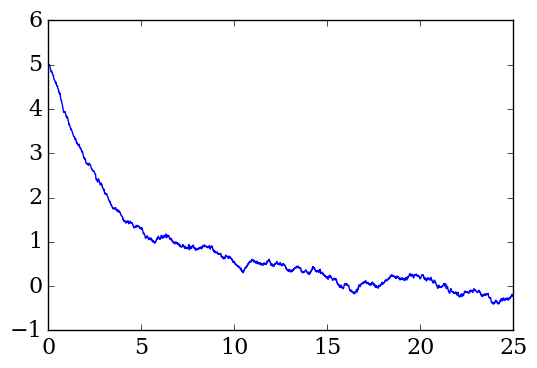

In [8]:
%%time
#Simulation for 100 Particles
nparticles = 20
t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,nparticles])
av_x = numpy.empty(nt+1)
#initial position
x[0] = 5

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,nparticles) - gamma*x[i]*dt
    av_x = x.sum(axis = (1))/nparticles #average position
for i in range(nparticles):
    pyplot.plot(t,x[:,i]) #plot trajectories for each particle
pyplot.figure()
pyplot.plot(t,av_x) #plot average trajectory

This time, position at time t becomes significant for the problem. We take an initial value far from 0 and observe the following:

Particles rapidly go towards 0.

After some "relaxation time", particles movement is still random, but bounded near 0.

With increasing gamma, particles are bounded stronger to 0.

Let's see if the curve for the average position is an exponential.

C:\Users\Chopin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


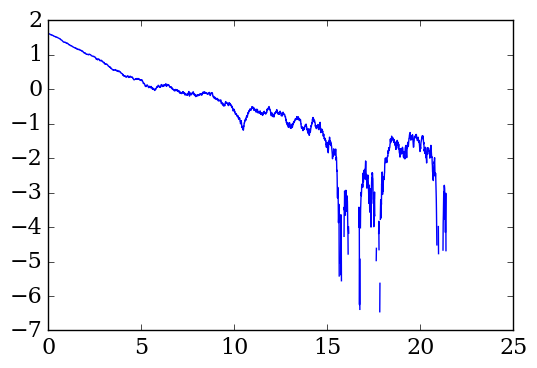

In [9]:
pyplot.figure()
pyplot.plot(t,numpy.log(av_x)) #plot log(average trajectory)

In [10]:
fit_for_position=numpy.polyfit(t[0:500],numpy.log(av_x[0:500]),1)
fit_for_position

array([-0.28879625,  1.62776298])

In [11]:
numpy.exp(fit_for_position[1])

5.0924699865716212

Very promising. For t = (0:5) we observe a pretty line. After that time, the average position is too close to 0 and random perturbations become important.
We fitted this line with a built-in function that fits polynomials minimising Khi^2 error, the first element in the list is the linear term. Notice that it is close to gamma and exponential of the independent term is close to the initial position.

METTRE EQUATION EN LATEX. If we suppose that x(t) = x0 . exp(-khi(t,gamma)) then we have ln(x(t)) = ln x - khi(t,gamma). From the discussion above we conclude x(t) = x0. exp(-gamma.t) explains quite good the average path a particle takes.

## Now, let's start with a gaussian distribution for particles and see what happens.

In [22]:
T = 25.
dt =0.01
nt= int(T/dt)
print(nt)

npart=10**4
mu= 1.
sigma = 1
alpha = 0.2
gamma = 0.5

2500


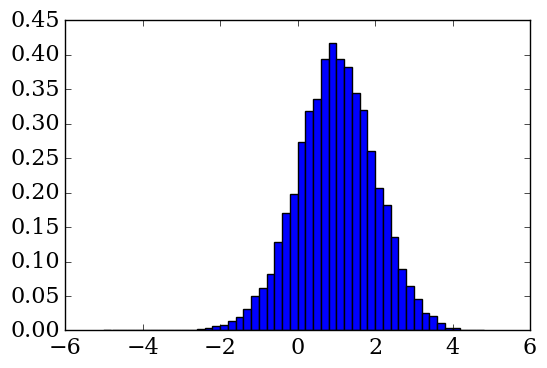

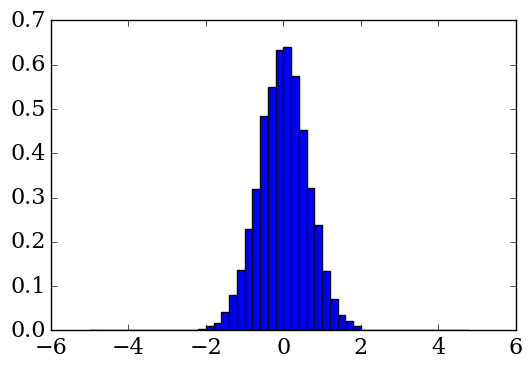

In [23]:
#Initial distribution and after time T
x= numpy.empty([nt+1,npart])
x0=numpy.random.normal(mu,sigma,npart)
x[0]=x0
#-------#
binwidth = 0.2
bins = numpy.arange(-5.,5.,binwidth)
pyplot.hist(x0,bins, normed = True);
#-------#
for i in range (nt):
    x[i+1] = x[i] + (2*alpha * dt)**0.5 * numpy.random.normal(0,1,npart) - gamma*x[i]*dt
pyplot.figure()
pyplot.hist(x[-1],bins,normed=True);

We observe the following:

Normal distribution is conserved.

Mean position goes to 0.

Variance has decreased.

It is a steady state. Changing the value of T to [10,15,20,25,30] changes nothing to the outcome.

We already investigated the effect of friction on mean position and proposed an equation for mu(t) that describes well the mean position.
We should investigate variance now. We will see how time, alpha and gamma affect it.

## Variance - time

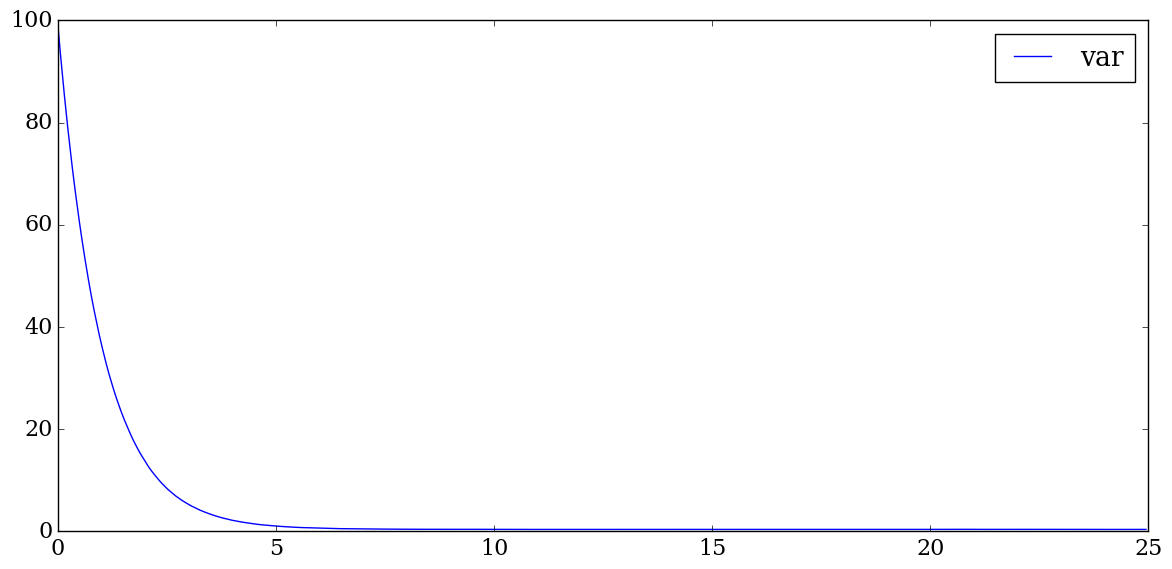

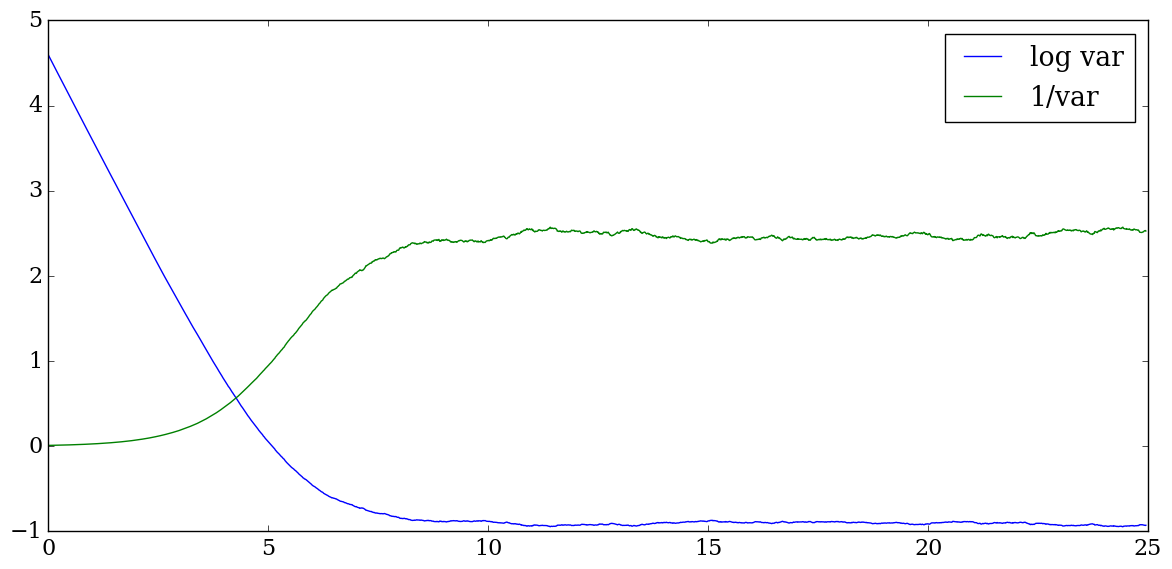

In [14]:
#We start by giving the (variance-time) plot. Same initial conditions as above.
sigma_special = 10 #A high value of sigma is needed to better show the behavior of sigma(t)
x0=numpy.random.normal(mu,sigma_special,npart)
x= numpy.empty([nt+1,npart])
x[0]=x0
var_list = numpy.empty(nt+1)
for i in range (nt):
    x[i+1] = x[i] + (2*alpha * dt)**0.5 * numpy.random.normal(0,1,npart) - gamma*x[i]*dt
    var_list[i] = numpy.var(x[i])
    #histogram
binwidth = 0.2
bins = numpy.arange(-5.,5.,binwidth)
pyplot.figure(figsize=(12,6))
pyplot.plot(t[:-5],var_list[:-5],label=r'var') #(variance-time) plot #the last value seems to explode inexplicably.
pyplot.legend()
pyplot.tight_layout()
pyplot.figure(figsize=(12,6))
pyplot.plot(t[:-5],numpy.log(var_list[:-5]),label=r'log var') #(log variance- time) plot
pyplot.plot(t[:-5],1/(var_list[:-5]),label=r'1/var') #(1/variance - time) plot
pyplot.legend()
pyplot.tight_layout()

We see that variance decreases over time, down to a steady value of 0.4. We also tried to inverse this function, whitout much succes. Yet, we see that before attaining a steady state, variance decreases as exp(-t).

## Variance - gamma 

We run the simulation for various gamma and compute the variance value when the state is steady. Then we plot (1/variance - gamma) and make a linear fit.

array([ 0.37854697, -0.33908284])

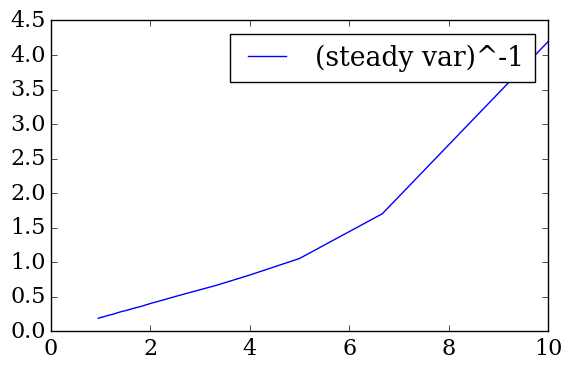

In [15]:
#For reminder, alpha = 0.2 #
x0=numpy.random.normal(mu,sigma,npart)
x= numpy.empty([nt+1,npart])
x[0]=x0
var_list = numpy.empty(nt+1)
var_gamma_list = numpy.empty([2,20])
for j in range (0,20):
    gamma1 = 0.1+j/20
    for i in range (nt):
        x[i+1] = x[i] + (2*alpha * dt)**0.5 * numpy.random.normal(0,1,npart) - gamma1*x[i]*dt
        var_list[i] = numpy.var(x[i])
    var_gamma_list[0,j] = numpy.average(var_list[1500:-5])
    var_gamma_list[1,j] = gamma1

pyplot.plot(1/var_gamma_list[1],var_gamma_list[0],label=r'(steady var)^-1')
pyplot.legend()
pyplot.tight_layout()
numpy.polyfit(1/var_gamma_list[1],var_gamma_list[0],1)

Variance when the state is steady is inversely propotional to gamma. Notice that the linear term of the fit is very close to alpha (=0.2) and the independent term is close to 0.

## Variance - alpha

We do the same thing, but for alpha.

array([ 2.01686026, -0.00779361])

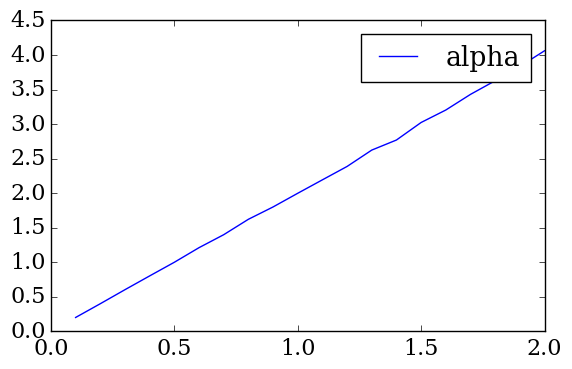

In [16]:
#gamma =0.5#
x0=numpy.random.normal(mu,sigma,npart)
var_list = numpy.empty(nt+1)
variance_alpha_list = numpy.empty([2,20])
for j in range (0,20):
    alpha = 0.1+j/10
    x= numpy.empty([nt+1,npart])
    x0=numpy.random.normal(mu,sigma,npart)
    x[0]=x0
    for i in range (nt):
        x[i+1] = x[i] + (2*alpha * dt)**0.5 * numpy.random.normal(0,1,npart) - gamma*x[i]*dt
        var_list[i] = numpy.var(x[i])
    variance_alpha_list[0,j] = numpy.average(var_list[1500:-5])
    variance_alpha_list[1,j] = alpha

pyplot.plot(variance_alpha_list[1],variance_alpha_list[0],label= 'alpha')
pyplot.legend()
pyplot.tight_layout()
numpy.polyfit(variance_alpha_list[1],variance_alpha_list[0],1)

We conclude that the end variance is proportional to alpha. Notice that the linear term of the fit is close to gamma^-1 and the independent term is almost nul.
After some tests with different alpha's, gamma's and initial variances, we concluded that the end variance is independent of the initial variance. The equation sigma^2 = alpha/gamma computes well variance for the steady state.

The discussion above leads us to propose an analitical form for the steady state. It is a gaussian distribution with mean = 0 and variance = (alpha/gamma). 

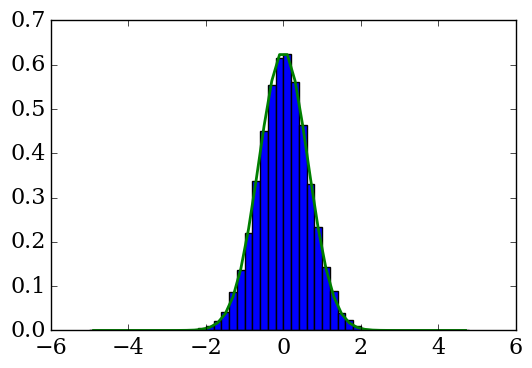

In [25]:
#Distribution for the steady state and our proposition of the analitical form.
x= numpy.empty([nt+1,npart])
x0=numpy.random.normal(mu,sigma,npart)
x[0]=x0
for i in range (nt):
    x[i+1] = x[i] + (2*alpha * dt)**0.5 * numpy.random.normal(0,1,npart) - gamma*x[i]*dt
pyplot.figure()
bins = numpy.arange(-5.,5.,binwidth)
pyplot.hist(x[-1],bins,normed=True);
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,normalgauss(xc,0,numpy.sqrt(alpha/gamma)), lw=2)